## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = merged_df['Mouse ID'].nunique()
mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep='first')]
duplicate_mice_ID_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = merged_df.loc[merged_df['Mouse ID'] == 'g989', :]
g989_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merge_df = merged_df[~merged_df.isin(duplicate_mice_ID_df)].dropna(how = 'all')
clean_merge_df.head()






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_merge_df['Mouse ID'].nunique()



249

In [7]:
clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen = clean_merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
grouped_regimen.describe()


Tumor Volume (mm3)                                            
                    mean     median        var        std        sem
count          10.000000  10.000000  10.000000  10.000000  10.000000
mean           50.983236  49.948493  47.787119   6.815695   0.500938
std             5.623264   4.713651  16.029830   1.217199   0.102812
min            40.216745  40.673236  23.486704   4.846308   0.320955
25%            52.442890  51.126513  40.249804   6.342952   0.475424
50%            53.060651  51.819532  45.836079   6.767301   0.521130
75%            54.183257  52.396036  60.738703   7.793357   0.579276
max            55.235638  53.698743  68.553577   8.279709   0.603860

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen = clean_merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
grouped_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## BAR AND PIE PLOTS

## Bar Plot using pandas

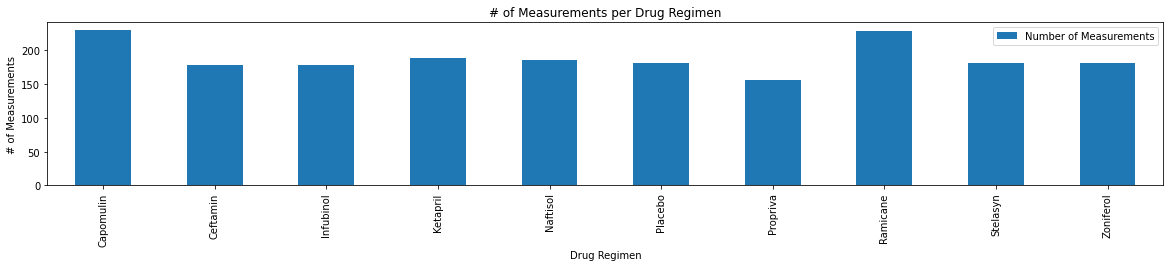

<Figure size 432x288 with 0 Axes>

In [10]:
regimen_mouse_count = clean_merge_df.groupby('Drug Regimen')['Mouse ID'].count()
regimen_mouse_count_df = pd.DataFrame({
    'Number of Measurements': regimen_mouse_count
})


regimen_mouse_count_df.plot(kind='bar', figsize=(20,3))
plt.title('# of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Measurements')
plt.show()
plt.tight_layout()

## Bar Plot using Pyplot

<Figure size 1440x720 with 0 Axes>

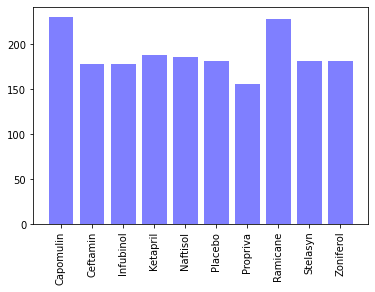

<Figure size 1440x720 with 0 Axes>

In [11]:
# x_axis = np.arange(len(regimen_mouse_count_df))
# tick_locations = [value for value in x_axis]


plt.bar(regimen_mouse_count_df.index, regimen_mouse_count_df['Number of Measurements'], color='blue', alpha=0.5, align="center")
plt.xticks(regimen_mouse_count_df.index, rotation="vertical")
plt.figure(figsize=(20,10))

## Pie Plot using pandas

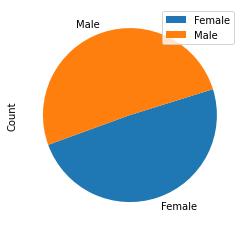

In [12]:
#Create a dataframe to put count of each sex in
sex_grouped = clean_merge_df.groupby('Sex')['Mouse ID'].count()
mouse_sex_df = pd.DataFrame({
    'Count': sex_grouped,
})


plot = mouse_sex_df.plot.pie(y='Count', startangle=200)


## Pie Plot using Pyplot

In [88]:
sex_grouped = clean_merge_df.groupby('Sex')['Mouse ID'].nunique()
mouse_sex_df = pd.DataFrame({
    'Count': sex_grouped
})
mouse_sex_df

,Count
Sex,
Female,124
Male,125


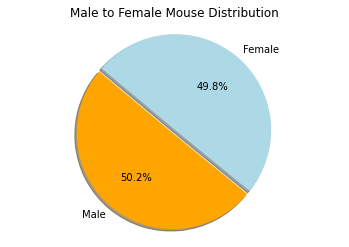

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ['Male', "Female"]
count = [125, 124]
colors = ['Orange', 'lightBlue']
explode = (0, 0.04)

plt.title('Male to Female Mouse Distribution')
plt.pie(count, explode=explode, labels=gender, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_mouse = clean_merge_df.groupby('Mouse ID')['Timepoint'].max()
max_mouse
# max_mouse_df = pd.DataFrame({
#     'Timepoint': max_mouse
    
# })

# max_mouse_df




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID
a203    45.0
a251    45.0
a262    45.0
a275    45.0
a366    30.0
        ... 
z435    10.0
z578    45.0
z581    45.0
z795    45.0
z969    45.0
Name: Timepoint, Length: 249, dtype: float64

In [118]:
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

merge_for_max_df = pd.merge(max_mouse_df, clean_merge_df, on='Timepoint')



drop_for_max_df = merge_for_max_df.drop_duplicates()


four_regimens = drop_for_max_df.loc[drop_for_max_df['Drug Regimen'].isin([
  'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
four_regimens

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45.0,k403,Ramicane,Male,21.0,16.0,22.050126,1.0
1,45.0,s185,Capomulin,Female,3.0,17.0,23.343598,1.0
2,45.0,x401,Capomulin,Female,16.0,15.0,28.484033,0.0
3,45.0,m601,Capomulin,Male,22.0,17.0,28.430964,1.0
4,45.0,g791,Ramicane,Male,11.0,16.0,29.128472,1.0
...,...,...,...,...,...,...,...,...
38306,20.0,x822,Ceftamin,Male,3.0,29.0,51.914910,2.0
38308,20.0,y163,Infubinol,Female,17.0,27.0,54.571076,1.0
38311,20.0,y769,Ceftamin,Female,6.0,27.0,55.025724,2.0
38312,20.0,y865,Ceftamin,Male,23.0,26.0,52.361982,1.0


In [ ]:
new_dataset = drop_for_max_df.loc[:, ['A','D']]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
